# Libraries

In [1]:
%pip install pandas
%pip install matplotlib
%pip install numpy

%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

# Importing rainfall data

In [3]:
from IPython.display import FileLink

upload = FileLink("Hourly-Rainfall.csv")
print(f"User file uploaded file: {upload}")

User file uploaded file: c:\Users\rushn\Desktop\JupyterNotes_2003101\Hourly-Rainfall.csv


In [4]:
df_rainfall= pd.read_csv("Hourly-Rainfall.csv")

 viewing the csv file

In [5]:
#df_rainfall.head()

In [6]:
#df_rainfall.tail()

In [7]:
df_rainfall.shape

(78848, 3)

In [8]:
df_rainfall.describe() 

,Current rainfall (mm),Cumulative rainfall (mm)
count,78844.000000,78847.000000
mean,0.049206,0.586580
std,0.765296,2.770216
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,110.000000,111.400000


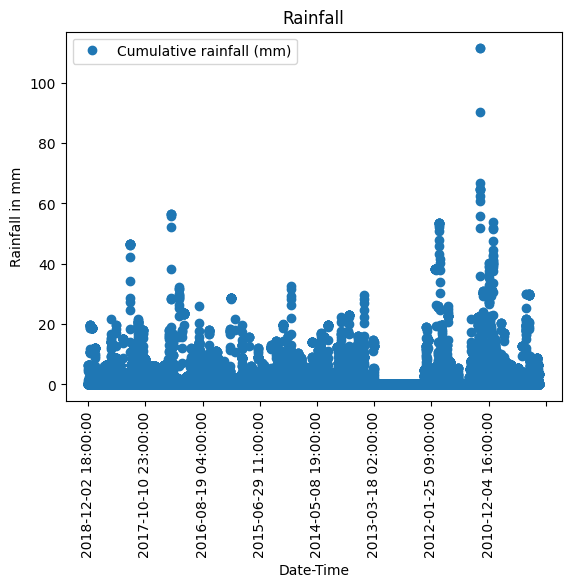

In [9]:
df_rainfall.plot(x='Date/Time', y='Cumulative rainfall (mm)', style='o')
plt.xticks(rotation=90)
plt.title('Rainfall')  
plt.xlabel('Date-Time')  
plt.ylabel('Rainfall in mm')  
plt.show()  

# Importing river level data

In [10]:
from IPython.display import FileLink

upload = FileLink("Hourly-River-Level.csv")
print(f"User file uploaded: {upload}")

User file uploaded: c:\Users\rushn\Desktop\JupyterNotes_2003101\Hourly-River-Level.csv


In [11]:
df_riverlvl = pd.read_csv("Hourly-River-Level.csv")

In [12]:
df_riverlvl.head()

,Date/Time,Level(m)
0,2018-12-02 17:00:00,1.61
1,2018-12-02 16:00:00,1.61
2,2018-12-02 15:00:00,1.62
3,2018-12-02 14:00:00,1.63
4,2018-12-02 13:00:00,1.63


In [13]:
#df_riverlvl.tail()

In [14]:
df_riverlvl.shape

(78822, 2)

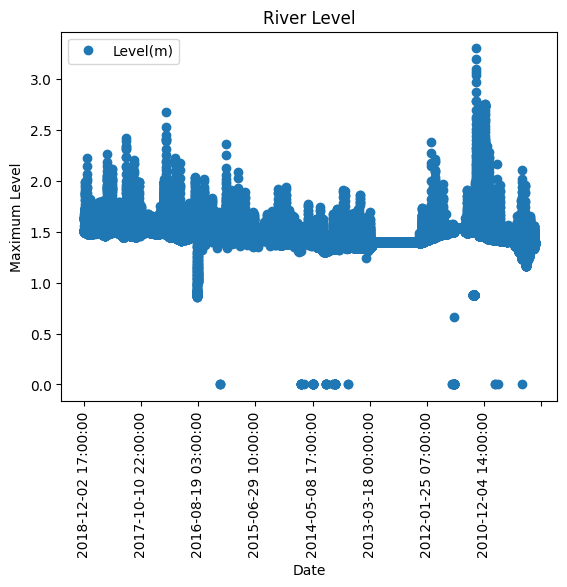

In [15]:
df_riverlvl.plot(x='Date/Time', y='Level(m)', style='o')  
plt.xticks(rotation=90)
plt.title('River Level')  
plt.xlabel('Date')  
plt.ylabel('Maximum Level')  
plt.show()  

# Merging rainfall and river-level data


In [16]:
df=pd.merge(df_rainfall, df_riverlvl, how = 'outer', on=['Date/Time'])

In [17]:
df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level(m)
0,2018-12-02 18:00:00,0.0,0.0,NaN
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


In [18]:
#df.tail()

In [19]:
df.shape

(78850, 4)

Missing data


In [20]:
df['Cumulative rainfall (mm)'] = df['Cumulative rainfall (mm)'].fillna(0)
df['Level(m)'] = df['Level(m)'].fillna(0)

df.head()

,Date/Time,Current rainfall (mm),Cumulative rainfall (mm),Level(m)
0,2018-12-02 18:00:00,0.0,0.0,0.00
1,2018-12-02 17:00:00,0.0,0.0,1.61
2,2018-12-02 16:00:00,0.0,0.0,1.61
3,2018-12-02 15:00:00,0.0,0.0,1.62
4,2018-12-02 14:00:00,0.0,0.0,1.63


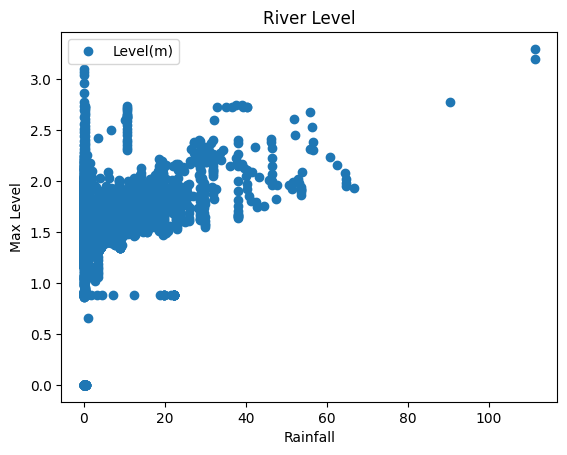

In [21]:
df.plot(x='Cumulative rainfall (mm)', y='Level(m)', style='o')  
plt.title('River Level')  
plt.xlabel('Rainfall')  
plt.ylabel('Max Level')  
plt.show()  

In [22]:
df.shape

(78850, 4)

In [23]:
df = df.drop(columns=['Current rainfall (mm)', 'Date/Time'])
df.shape

(78850, 2)

In [24]:
df.head()

,Cumulative rainfall (mm),Level(m)
0,0.0,0.00
1,0.0,1.61
2,0.0,1.61
3,0.0,1.62
4,0.0,1.63


# Dataframe (Logistic Regression)

In [25]:
df['Flood?']= (df['Level(m)'] > 1.5).astype(int)

In [26]:
df.head()

,Cumulative rainfall (mm),Level(m),Flood?
0,0.0,0.00,0
1,0.0,1.61,1
2,0.0,1.61,1
3,0.0,1.62,1
4,0.0,1.63,1


# Importing the datasets

In [27]:
X = df.iloc[:, :1].values
Y = df.iloc[:, 1:2].values

In [28]:
print(X)
print(Y)

[[0. ]
 [0. ]
 [0. ]
 ...
 [0.2]
 [0.2]
 [0.2]]
[[0.  ]
 [1.61]
 [1.61]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


In [29]:
y = Y.reshape(len(Y),1)
print(y)

[[0.  ]
 [1.61]
 [1.61]
 ...
 [0.  ]
 [0.  ]
 [0.  ]]


# Importing the datasets (Logistic Regression)

In [30]:
A = df.iloc[:, :-1].values
B = df.iloc[:, -1].values

In [31]:
print(A)
print(B)

[[0.   0.  ]
 [0.   1.61]
 [0.   1.61]
 ...
 [0.2  0.  ]
 [0.2  0.  ]
 [0.2  0.  ]]
[0 1 1 ... 0 0 0]


# Splitting the datasets(Linear Regression)
(Training sets and test sets)

In [32]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) 

In [33]:
#print(X_train)

In [34]:
#print(Y_train)
Y_train.shape

(63080, 1)

In [35]:
#print(X_test)

In [36]:
#print(Y_test)
Y_test.shape

(15770, 1)

In [37]:
from sklearn.preprocessing import Normalizer
nl_x_train= Normalizer()
nl_y_train = Normalizer()
nl_x_test= Normalizer()
nl_y_test = Normalizer()
nl_x= Normalizer()
nl_y = Normalizer()
x_train = nl_x_train.fit_transform(X_train)
y_train = nl_y_train.fit_transform(Y_train)
x_test = nl_x_test.fit_transform(X_test)
y_test = nl_y_test.fit_transform(Y_test)
x = nl_x_train.fit_transform(X)
y = nl_y_train.fit_transform(Y)

#  Splitting the datasets(Logistic Regression)
(Training sets and test sets)

In [38]:
from sklearn.model_selection import train_test_split
A_train,A_test, B_train, B_test = train_test_split(A, B, test_size = 0.25, random_state = 0)

In [39]:
#print(A_train)

In [40]:
#print(B_train)

In [41]:
#print(A_test)

In [42]:
#print(B_test)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

# Training the Model on the training set (Linear Regression)

In [44]:
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(X_train, Y_train)


LinearRegression()

In [45]:
print(regressor.intercept_)

[1.44348876]


In [46]:
print(regressor.coef_)

[[0.01698111]]


Visualising The Training set 

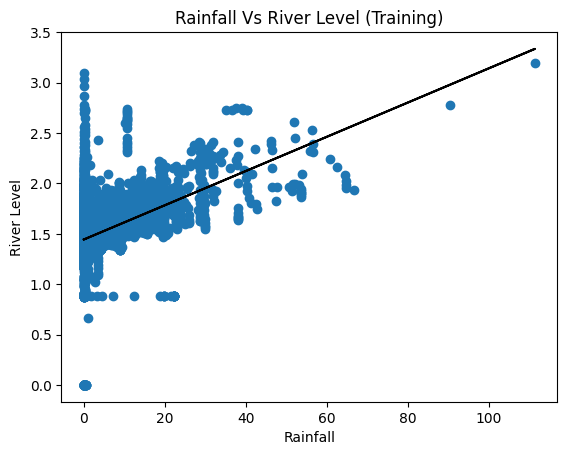

In [47]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Rainfall Vs River Level (Training)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

Predicting the test set

In [48]:
Y_predict= regressor.predict(X_test)
print(Y_predict)
Y_predict.shape

[[1.44348876]
 [1.44348876]
 [1.44348876]
 ...
 [1.44348876]
 [1.58613007]
 [1.44348876]]


(15770, 1)

Visualising the Test set results

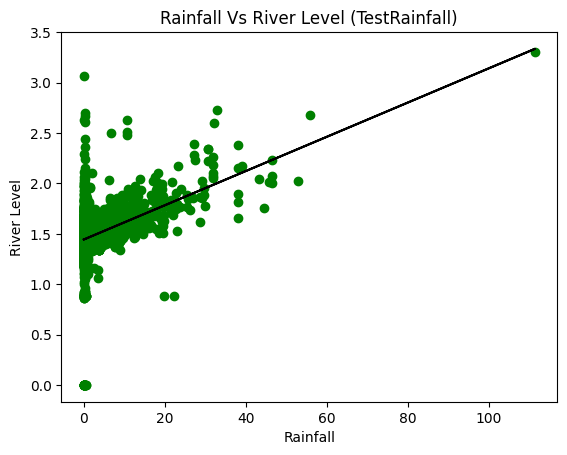

In [49]:
plt.scatter(X_test, Y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'black')
plt.title('Rainfall Vs River Level (TestRainfall)')
plt.xlabel('Rainfall')
plt.ylabel('River Level')
plt.show()

Taking Input(Rainfall in mm)

In [50]:
Rainfall_ipt=22

In [51]:
predicted_riverlevel1 = regressor.predict([[Rainfall_ipt]])


In [52]:
from sklearn.metrics import r2_score
r2_linear=r2_score(Y_test, Y_predict)
print(r2_linear)

0.1827183960525688


# Training the Polynomial Regression model

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X)
reg_2 = LinearRegression()
reg_2.fit(X_poly, Y)

LinearRegression()

In [54]:
poly_reg2 = PolynomialFeatures(degree = 1)
X_poly2 = poly_reg2.fit_transform(X_train)
reg_21 = LinearRegression()
reg_21.fit(X_poly2, Y_train)

LinearRegression()

In [55]:
poly_reg3 = PolynomialFeatures(degree = 1)
X_poly3 = poly_reg3.fit_transform(X_test)
reg_22 = LinearRegression()
reg_22.fit(X_poly3, Y_test)

LinearRegression()

 Visualising the  Polynominal Regression results (whole DF, training set, test set)

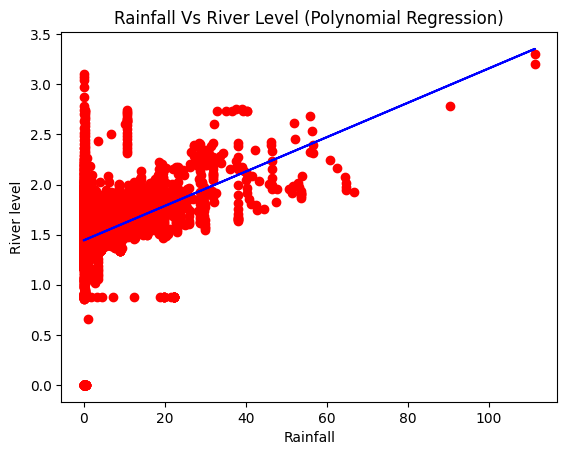

In [56]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Rainfall Vs River Level (Polynomial Regression)')
plt.ylabel('River level')
plt.xlabel('Rainfall')
plt.show()

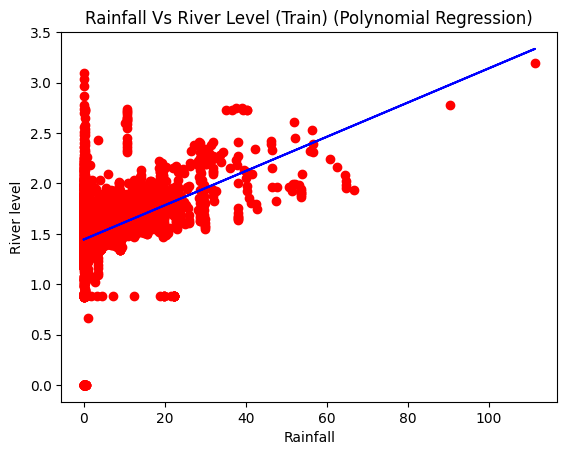

In [57]:
plt.scatter(X_train, Y_train, color = 'red')
plt.plot(X_train, reg_21.predict(poly_reg2.fit_transform(X_train)), color = 'blue')
plt.title('Rainfall Vs River Level (Train) (Polynomial Regression)')
plt.ylabel('River level')
plt.xlabel('Rainfall')
plt.show()

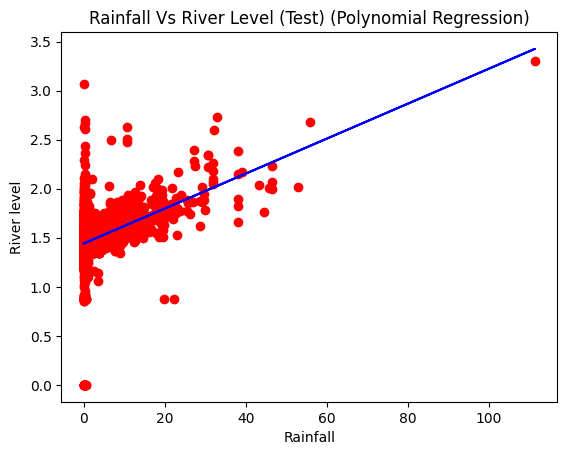

In [58]:
plt.scatter(X_test, Y_test, color = 'red')
plt.plot(X_test, reg_22.predict(poly_reg3.fit_transform(X_test)), color = 'blue')
plt.title('Rainfall Vs River Level (Test) (Polynomial Regression)')
plt.ylabel('River level')
plt.xlabel('Rainfall')
plt.show()

Predicting 

In [59]:
Y_pred_poly = reg_21.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=1)
print(np.concatenate((Y_pred_poly.reshape(len(Y_pred_poly),1), Y_test.reshape(len(Y_test),1)),1))

[[1.4 1.5]
 [1.4 1.5]
 [1.4 1.4]
 ...
 [1.4 1.4]
 [1.6 1.6]
 [1.4 1.4]]


In [60]:
from sklearn.metrics import r2_score
r2_poly=r2_score(Y_test, Y_pred_poly)
print(r2_poly)

0.1827183960525688


In [61]:
predicted_riverlevel2 = reg_2.predict(poly_reg.fit_transform([[Rainfall_ipt]]))

In [62]:
reg_21.predict(poly_reg2.fit_transform([[Rainfall_ipt]]))

array([[1.8]])

In [63]:
reg_22.predict(poly_reg3.fit_transform([[Rainfall_ipt]]))

array([[1.8]])

# Training the SVR model 

In [64]:
from sklearn.svm import SVR
regsvr = SVR(kernel = 'rbf')
regsvr.fit(x, y.ravel())

SVR()

In [65]:

regsvr1 = SVR(kernel = 'rbf')
regsvr1.fit(x_train, y_train.ravel())

SVR()

Predicting

In [66]:
y_pred_svr = regsvr1.predict(nl_x.transform(x_test)).reshape(-1,1)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_svr.reshape(len(y_pred_svr),1), y_test.reshape(len(y_test),1)),1))

[[0.9 1. ]
 [0.9 1. ]
 [0.9 1. ]
 ...
 [0.9 1. ]
 [0.9 1. ]
 [0.9 1. ]]


In [67]:
from sklearn.metrics import r2_score
r2_svr=r2_score(y_test, y_pred_svr)

In [68]:
min_val = y.min()
max_val = y.max()
print(min_val)
print(max_val)

0.0
1.0


In [69]:
predicted_riverlevel3 = regsvr.predict(nl_x.transform([[Rainfall_ipt]]))*(max_val-min_val)+min_val

# Training the Decision Tree Regression model 

In [70]:
from sklearn.tree import DecisionTreeRegressor
regressorDT = DecisionTreeRegressor(random_state = 4)
regressorDT.fit(X, Y)

DecisionTreeRegressor(random_state=4)

In [71]:
regressorDT1 = DecisionTreeRegressor(random_state = 4)
regressorDT1.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=4)

Predicting

In [72]:
Y_pred_DT = regressorDT1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_DT.reshape(len(Y_pred_DT),1), Y_test.reshape(len(Y_test),1)),1))

[[1.44 1.49]
 [1.44 1.47]
 [1.44 1.41]
 ...
 [1.44 1.39]
 [1.63 1.55]
 [1.44 1.41]]


In [73]:
from sklearn.metrics import r2_score
r2_DT=r2_score(Y_test, Y_pred_DT)
print(r2_DT)

0.1949263944130274


In [74]:
predicted_riverlevel4 = regressorDT.predict([[Rainfall_ipt]])

Visualising the desicion tree Regression

C:\Users\rushn\AppData\Local\Temp\ipykernel_12644\2818774025.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


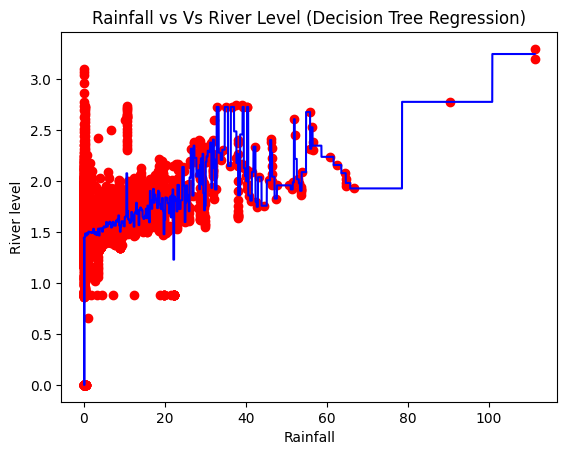

In [75]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressorDT.predict(X_grid), color = 'blue')
plt.title('Rainfall vs Vs River Level (Decision Tree Regression)')
plt.xlabel('Rainfall')
plt.ylabel('River level')
plt.show()

# Training the Random Forest Regression model 

In [76]:
from sklearn.ensemble import RandomForestRegressor
regressorRT = RandomForestRegressor(n_estimators = 50, random_state = 5)
regressorRT.fit(X, Y.ravel())

RandomForestRegressor(n_estimators=50, random_state=5)

In [77]:
regressorRT1 = RandomForestRegressor(random_state = 4)
regressorRT1.fit(X_train, Y_train)

c:\Users\rushn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=4)

Predicting

In [89]:
Y_pred_RT = regressorRT1.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((Y_pred_RT.reshape(len(Y_pred_RT),1), Y_test.reshape(len(Y_test),1)),1))

[[1.44 1.49]
 [1.44 1.47]
 [1.44 1.41]
 ...
 [1.44 1.39]
 [1.63 1.55]
 [1.44 1.41]]


In [90]:
from sklearn.metrics import r2_score
r2_RT=r2_score(Y_test, Y_pred_RT)
print(r2_RT)

0.1976368410123961


In [91]:
predicted_riverlevel5 = regressorRT.predict([[Rainfall_ipt]])

Visualising the Ranndom Forest Regression

C:\Users\rushn\AppData\Local\Temp\ipykernel_12644\1639705184.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.01)


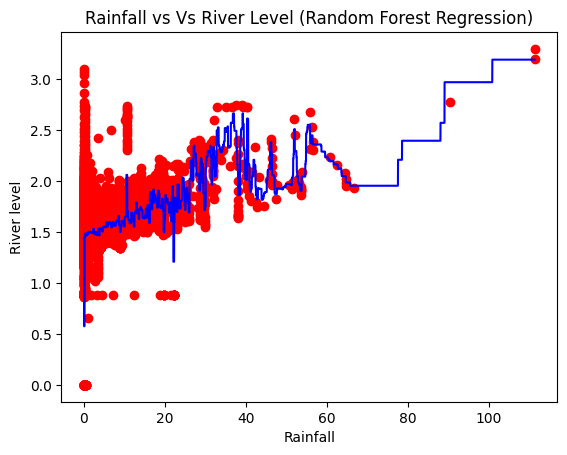

In [94]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid, regressorRT.predict(X_grid), color = 'blue')
plt.title('Rainfall vs Vs River Level (Random Forest Regression)')
plt.xlabel('Rainfall')
plt.ylabel('River level')
plt.show()

# Training the Model on the training set (Logistic Regression)

In [82]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 3)
classifier.fit(A_train, B_train)

LogisticRegression(random_state=3)

Predicting

In [83]:
print(classifier.predict(sc.transform([[Rainfall_ipt,1.6]])))

[1]


Predicting the Test set results

In [84]:
B_pred = classifier.predict(A_test)
print(np.concatenate((B_pred.reshape(len(B_pred),1), B_test.reshape(len(B_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


Making the Confusion Matrix

In [85]:
from sklearn.metrics import confusion_matrix, accuracy_score
mat = confusion_matrix(B_test, B_pred)
print(mat)
accuracy_score(B_test, B_pred)

[[15301     0]
 [    0  4412]]


1.0

Visualising Train sets

C:\Users\rushn\AppData\Local\Temp\ipykernel_12644\40784860.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)


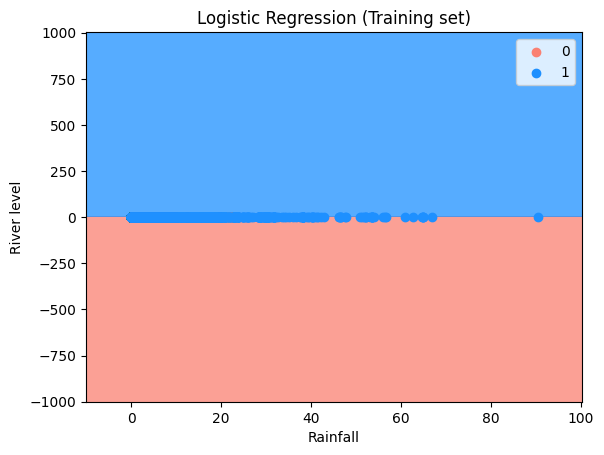

In [86]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(A_train), B_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=0.25)
)


cmap = ListedColormap(['salmon', 'dodgerblue'])


plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape), alpha=0.75, cmap=cmap)

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=cmap(i), label=j)

plt.title('Logistic Regression (Training set)')
plt.xlabel('Rainfall')
plt.ylabel('River level')
plt.legend()
plt.show()


# Predicting Flood

In [87]:
if (predicted_riverlevel1 > 1.5):
  print("Linear Regression: FLOOD",predicted_riverlevel1,"r2_score",r2_linear )
else:
  print("Linear Regression: NO FLOOD",predicted_riverlevel1,"r2_score",r2_linear
)
if (predicted_riverlevel2 > 1.5):
  print("Polynominal Regression: FLOOD",predicted_riverlevel2,"r2_score",r2_poly
)
else:
  print("Polynominal Regression: NO FLOOD",predicted_riverlevel2,"r2_score",r2_poly
)
if (predicted_riverlevel3 > 1.5):
  print("Supported Vector Regression: FLOOD",predicted_riverlevel3,"r2_score",r2_svr
       )
else:
  print("Supported Vector Regression: NO FLOOD",predicted_riverlevel3,"r2_score",r2_svr
)
if (predicted_riverlevel4 > 1.5):
  print("Decision Tree Regression: FLOOD",predicted_riverlevel4,"r2_score",r2_DT
)
else:
  print("Decision Tree Regression: NO FLOOD",predicted_riverlevel4,"r2_score",r2_DT
)
if (predicted_riverlevel5 > 1.5):
  print("Random Forest Regression: FLOOD",predicted_riverlevel5,"r2_score",r2_RT
)
else:
  print("Random Forest Regression: NO FLOOD",predicted_riverlevel5,"r2_score",r2_RT
)


Linear Regression: FLOOD [[1.82]] r2_score 0.1827183960525688
Polynominal Regression: FLOOD [[1.82]] r2_score 0.1827183960525688
Supported Vector Regression: NO FLOOD [0.9] r2_score -7.320603878095964
Decision Tree Regression: FLOOD [1.92] r2_score 0.1949263944130274
Random Forest Regression: FLOOD [1.95] r2_score 0.1949263944130274
